 # <span style="color:green">          KNN 


**Problem Statement**

The problem that we are going to solve here is that given a set of features that describe a tumour whether it is Malignant or Benign, our machine learning model must predict whether the tumour is Malignant or Benign. To train our machine learning model with tumour data, we will be using [SCLCData](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv)


In [1]:
# importing libraried
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data
data =pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv",sep=",")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
# for no of rows and columns
data.shape

(569, 32)

In [4]:
# checking the frequency of B and M
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
# checking null values
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [6]:
# describing the values
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# splitting the data into input and output --> train and test 
# train--> Building the model
# testing --> how well the model will work when it sees the new dataset

In [8]:
# preparing input and output

In [9]:
# prepating the input values
# drop the id and the input columns
X=data.drop(["id","diagnosis"],axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [10]:
# preparing the output column which is the diagnosis
y=data.diagnosis
y.head()

0    B
1    B
2    B
3    B
4    B
Name: diagnosis, dtype: object

In [11]:
# preparing training and testing data
from sklearn.model_selection import train_test_split

In [12]:
# storing 70% of the total data into training 
# the remaining 30% as test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,
                                               random_state=2)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train=scaler.fit_transform(X_train)
scaled_X_train

array([[ 0.0654828 , -1.35518629,  0.03134589, ..., -0.04689041,
         0.3683001 , -1.22806684],
       [-0.77639967, -0.1225787 , -0.77192193, ..., -0.39868555,
         0.3648074 , -0.83648993],
       [-0.84936282, -1.05782571, -0.87563499, ..., -1.03880764,
        -1.65746674, -0.54459715],
       ...,
       [-0.88303812, -0.35998755, -0.85204535, ..., -0.1993652 ,
        -0.98162901, -0.01313199],
       [ 1.07854805,  0.213151  ,  0.91351698, ...,  0.10120204,
         3.54665843, -1.20658794],
       [-0.26846391, -0.90674734, -0.26149099, ..., -0.22037015,
         1.74267813,  0.1823811 ]])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scaling for train data we use fit_transform 
# cuz in fit when it comes to the train it finds mean and variance
# based on mean and variance it will apply it to the train data

scaled_X_train=pd.DataFrame(scaler.fit_transform(X_train),
                            columns=X_train.columns)
scaled_X_train

# scaling for test data and for test we should only use transform
# cuz in fit when it comes to the train it finds mean and variance
# based on mean and variance it will apply it to the train data

scaled_X_test=pd.DataFrame(scaler.transform(X_test),
                            columns=X_train.columns)
scaled_X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.767981,-0.055433,-0.795918,-0.721932,-0.589333,-0.996232,-0.780212,-0.661564,0.810759,-0.417646,...,-0.785433,0.137175,-0.806874,-0.716765,-0.854530,-0.972772,-0.923478,-0.752143,0.726302,-0.720284
1,-0.116925,-0.731688,-0.158591,-0.209416,-0.875377,-0.728226,-0.760262,-0.697520,0.281483,-0.839423,...,-0.273344,-0.865993,-0.216452,-0.348722,-0.911689,-0.222689,-0.624656,-0.633669,0.824098,-0.330910
2,1.100998,-0.544639,1.047734,0.940735,-0.426476,0.438365,0.300001,0.371772,-0.289084,-0.675726,...,0.870599,-0.559798,0.797992,0.733636,-0.216988,0.157285,0.858626,0.630104,-0.015897,-0.042321
3,-0.922326,1.220340,-0.929322,-0.818221,-0.951934,-0.683493,-0.888348,-1.005166,0.671871,0.132434,...,-0.647087,1.035458,-0.669891,-0.636120,-0.476402,-0.531335,-0.990740,-1.196269,0.363061,-0.372215
4,0.570612,-1.021855,0.510866,0.408905,-0.045084,-0.310914,-0.386171,-0.065263,-0.232778,-0.535625,...,0.319276,-0.972569,0.280965,0.134281,-0.467608,-0.472006,-0.138962,0.016578,-0.127664,-0.710370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.860588,-0.549435,-0.846758,-0.785752,0.842278,-0.447664,-0.697999,-0.583830,-0.311607,0.150131,...,-0.775109,0.187925,-0.787857,-0.695690,0.249076,-0.631995,-0.765225,-0.566574,0.256534,-0.231776
167,-0.086056,-0.798834,-0.053251,-0.195421,0.355099,0.532539,-0.095310,0.071722,-0.506801,0.483424,...,0.083880,-0.756033,0.114565,-0.101734,0.433744,0.741246,0.097336,0.400409,-0.457724,1.100466
168,-0.647311,-0.446318,-0.670242,-0.621444,-0.329040,-0.756086,-0.722523,-0.797030,0.187639,-0.323262,...,-0.560362,-0.141953,-0.607491,-0.537882,-0.300528,-0.469339,-0.572761,-0.880137,-0.125917,-0.099598
169,2.144933,0.448162,2.259753,2.343085,-0.110505,1.868645,1.704113,1.543105,-0.285331,-0.065182,...,2.483269,0.482278,2.658104,2.635688,-0.177417,1.529859,1.622939,1.092515,-0.031614,0.306298


In [16]:
# model building
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,metric="euclidean")
# applying on the the data set
knn.fit(scaled_X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [17]:
# predictions on the data
# predict function
# syntax objectname.predict(input)
y_train_predict=knn.predict(scaled_X_train)
y_train_predict

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

In [18]:
# checking the accuracy
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       257
           M       1.00      0.96      0.98       141

    accuracy                           0.99       398
   macro avg       0.99      0.98      0.99       398
weighted avg       0.99      0.99      0.99       398



In [19]:
from sklearn.metrics import accuracy_score
scores=[]
# checking for optimum k value
# building the model with multiple k values
for k in range(1,40):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    pred_test=knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test,pred_test))
scores

[0.9181286549707602,
 0.9473684210526315,
 0.9590643274853801,
 0.9415204678362573,
 0.9590643274853801,
 0.9590643274853801,
 0.9649122807017544,
 0.9532163742690059,
 0.9590643274853801,
 0.9532163742690059,
 0.9532163742690059,
 0.9415204678362573,
 0.9473684210526315,
 0.935672514619883,
 0.9473684210526315,
 0.9415204678362573,
 0.9415204678362573,
 0.9415204678362573,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9415204678362573,
 0.935672514619883,
 0.9415204678362573,
 0.9415204678362573,
 0.9415204678362573,
 0.935672514619883,
 0.9298245614035088,
 0.935672514619883,
 0.9415204678362573,
 0.9415204678362573,
 0.9415204678362573,
 0.9415204678362573,
 0.9415204678362573,
 0.9415204678362573,
 0.9415204678362573,
 0.9415204678362573,
 0.9415204678362573,
 0.9415204678362573]

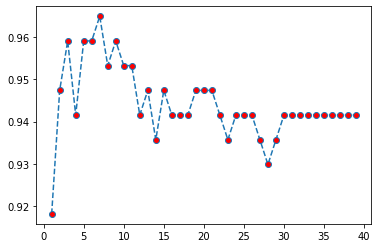

In [20]:
# plot of kavlues and scores
plt.plot(range(1,40),scores,marker='o',markerfacecolor="r",linestyle="--")

In [21]:
# optimun k value is 7
final_model=KNeighborsClassifier(n_neighbors=7,metric="euclidean")
final_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [22]:
# predicting on the training data
final_train_pred=final_model.predict(scaled_X_train)
final_train_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

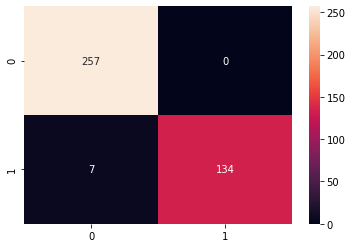

In [23]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,final_train_pred),annot=True,fmt="d",annot_kws={"ha":"center","va":"center"})

In [24]:
# classification report 
# prediction-->PPV-->out of the positive values,how many true positives are there
print(classification_report(y_train,final_train_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99       257
           M       1.00      0.95      0.97       141

    accuracy                           0.98       398
   macro avg       0.99      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



In [25]:
# prediction on test data 
final_test_pred=final_model.predict(scaled_X_test)
final_test_pred

array(['B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

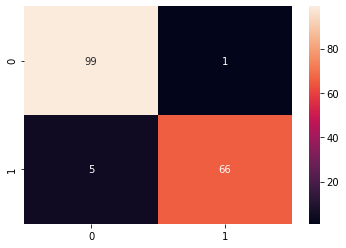

In [26]:
# confusion matrics
sns.heatmap(confusion_matrix(y_test,final_test_pred),annot=True,fmt="d")

In [27]:
# classificaton report for test data 
print(classification_report(y_test,final_test_pred))

              precision    recall  f1-score   support

           B       0.95      0.99      0.97       100
           M       0.99      0.93      0.96        71

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



# Day 33(1-07-2020)

In [28]:
# predicting the probability 
# predict--> gives predicted values fro m or b
# predic_proba--> probalility associated with b and m
# syntax: objectname.predict_proba(input values)
y_test_proba=final_model.predict_proba(scaled_X_test)
y_test_proba=pd.DataFrame(y_test_proba)
y_test_proba
# 0 is benine and 1 is magninent 

,0,1
0,1.000000,0.000000
1,1.000000,0.000000
2,0.142857,0.857143
3,1.000000,0.000000
4,1.000000,0.000000
...,...,...
166,1.000000,0.000000
167,0.857143,0.142857
168,1.000000,0.000000
169,0.000000,1.000000


In [29]:
y_test_prob=final_model.predict(scaled_X_test)
y_test_prob=pd.DataFrame(y_test_prob)
y_test_prob

,0
0,B
1,B
2,M
3,B
4,B
...,...
166,B
167,B
168,B
169,M


In [38]:
y_test

528    B
291    B
467    M
108    B
340    B
      ..
2      B
25     M
52     B
386    M
476    B
Name: diagnosis, Length: 171, dtype: object

In [40]:
# Roc curve
from sklearn.metrics import roc_auc_score,roc_curve
m_prob=final_model.predict_proba(scaled_X_test)[:,1]
tpr,fpr,threshold=roc_curve(y_test,m_prob,pos_label="M")

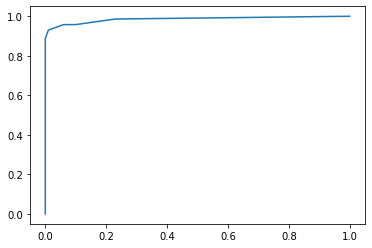

In [47]:
plt.plot(tpr,fpr)

In [44]:
pd.DataFrame(tpr)

,0
0,0.00
1,0.00
2,0.00
3,0.01
4,0.06
5,0.10
6,0.23
7,1.00


In [43]:
pd.DataFrame(fpr)

,0
0,0.000000
1,0.746479
2,0.887324
3,0.929577
4,0.957746
5,0.957746
6,0.985915
7,1.000000


In [45]:
pd.DataFrame(threshold)

,0
0,2.000000
1,1.000000
2,0.714286
3,0.571429
4,0.428571
5,0.285714
6,0.142857
7,0.000000


In [48]:
roc_auc_score(y_test,m_prob)

0.9854929577464789

In [49]:
# K fold
# 5 folds in each and every fold 
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5)
kfold.get_n_splits(X,y)

5

In [51]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=7,metric='euclidean')
#model will build for 5 times->for loop
#some set of indices will be in test data and he remaining set of indices will be in training data
#in each and every fold, it is splitting training and testing data

score=[]
for train_index, test_index in kfold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    #Using iloc to access the inidices of the selected data splits
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #pass the X_train,_train into the knn algorithm
    model_knn.fit(X_train,y_train)
    
    #Predict the model on test data(X_test,y_test)
    y_pred_test = model_knn.predict(X_test)
    
    #Accuracy score of y_pred_test and actual values(y_test)
    accuracy = accuracy_score(y_test,y_pred_test)
    #Runs for 5 times , 5 models will be built , 5 accuracies are made.
    score.append(accuracy)
print(score)
print('Average score of the model:' ,np.mean(score))
    

[0.9122807017543859, 0.9035087719298246, 0.956140350877193, 0.9473684210526315, 0.9469026548672567]
Average score of the model: 0.9332401800962584
